In [ ]:
## Loading the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
health_data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
health_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
health_data.shape


(9722, 12)

In [ ]:
health_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

####Drop The Columns

In [ ]:
health_data.drop(['id'], axis =1, inplace = True)

In [ ]:
health_data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             9722 non-null   object 
 1   age                9722 non-null   float64
 2   hypertension       9722 non-null   int64  
 3   heart_disease      9722 non-null   int64  
 4   ever_married       9722 non-null   object 
 5   work_type          9722 non-null   object 
 6   Residence_type     9722 non-null   object 
 7   avg_glucose_level  9722 non-null   float64
 8   bmi                8604 non-null   float64
 9   smoking_status     9722 non-null   object 
 10  stroke             9722 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 835.6+ KB


In [ ]:
health_data[health_data.duplicated()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5110,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
5111,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5113,Female,79.0,0,1,Yes,Private,Urban,214.09,28.2,never smoked,1
5114,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
5115,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
9717,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
9718,Male,54.0,0,0,Yes,Private,Urban,104.51,27.3,smokes,1
9719,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
9720,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
health_data.isnull().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  1118
smoking_status          0
stroke                  0
dtype: int64

In [ ]:
health_data['bmi'].mean()

29.15056950255695

In [ ]:
health_data['bmi'] = health_data['bmi'].fillna(health_data['bmi'].mean())

In [ ]:
health_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

####Visual Categorization of Columns:

In [ ]:
Cat_columns = health_data.select_dtypes(exclude=np.number).columns
Cat_columns
svc_multiplier = 1000

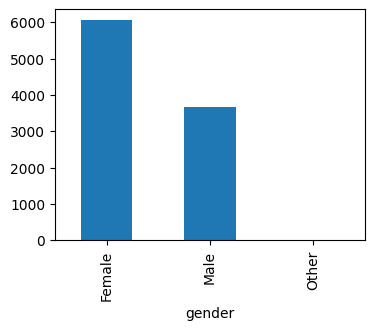

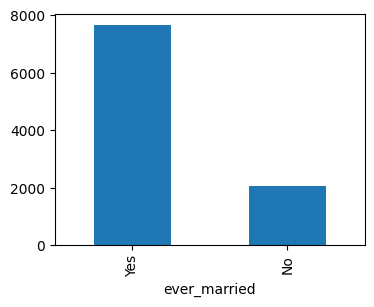

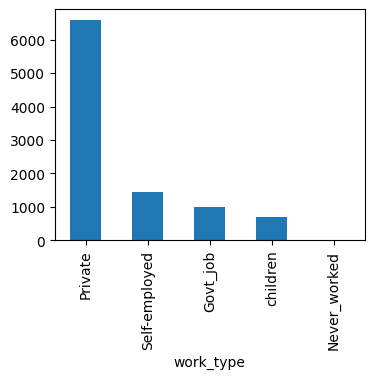

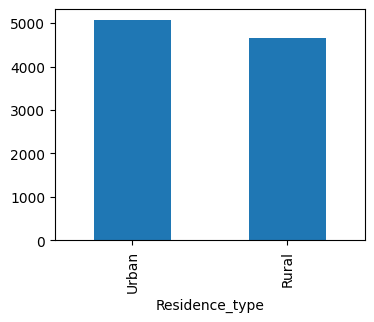

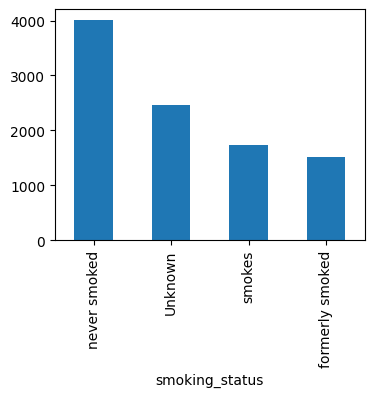

In [ ]:
for col in Cat_columns:
  plt.figure(figsize=(4,3))
  ax = health_data[col].value_counts().plot(kind='bar')

####Numerical Columns

In [ ]:
Num_columns = health_data.select_dtypes(include= np.number).columns
Num_columns


Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [ ]:
Num_cols = ['age', 'avg_glucose_level', 'bmi']

####Numerical Columns - Histogram:

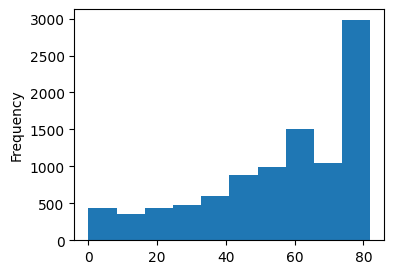

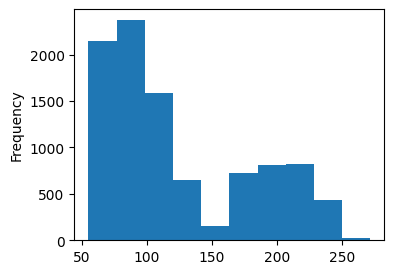

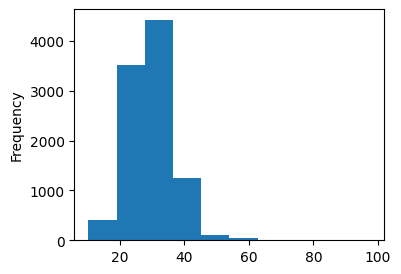

In [ ]:
for col in Num_cols:
  plt.figure(figsize=(4,3))
  health_data[col].plot(kind = 'hist')
  for i in ax.containers:
    ax.bar_label(i)
  plt.show()


**Numeric Columns: Box Plot** ##Detecting Outliers

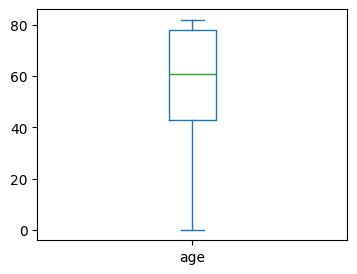

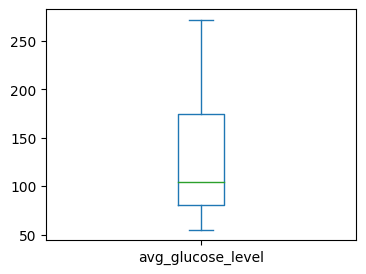

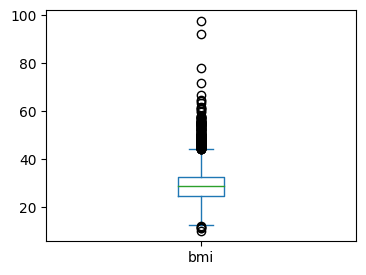

In [ ]:
for col in Num_cols:
  plt.figure(figsize=(4,3))
  health_data[col].plot(kind = 'box')
  for i in ax.containers:
    ax.bar_label(i)
  plt.show()

# Scatter Plot -Correlation Among Numeric Variables

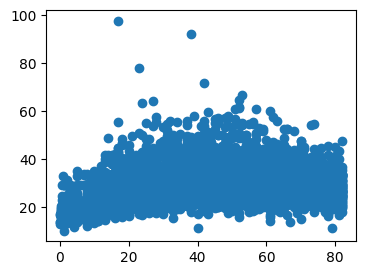

In [ ]:
plt.figure(figsize=(4,3))
plt.scatter(health_data.age, health_data.bmi)
plt.show()

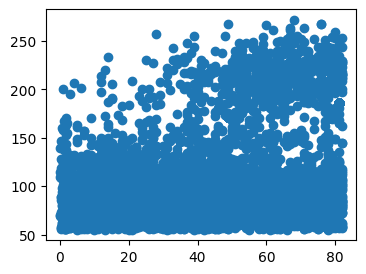

In [ ]:
plt.figure(figsize=(4,3))
plt.scatter(x=health_data.age, y=health_data.avg_glucose_level)
plt.show()

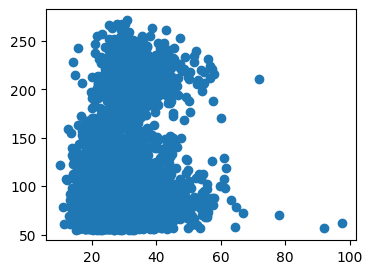

In [ ]:
plt.figure(figsize=(4,3))
plt.scatter(x=health_data.bmi, y=health_data.avg_glucose_level)
plt.show()

# Correlation Matrix

In [ ]:
cor_matrix = health_data[Num_columns].corr()
cor_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.300428,0.394292,0.304275,0.184551,0.623570
hypertension,0.300428,1.000000,0.034190,-0.033817,-0.014183,0.153571
heart_disease,0.394292,0.034190,1.000000,0.334893,0.220372,0.422017
avg_glucose_level,0.304275,-0.033817,0.334893,1.000000,0.209471,0.328781
bmi,0.184551,-0.014183,0.220372,0.209471,1.000000,0.050382
stroke,0.623570,0.153571,0.422017,0.328781,0.050382,1.000000


<Axes: >

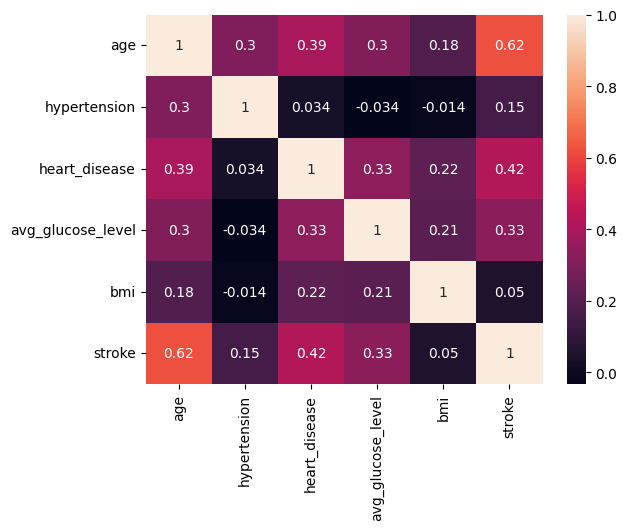

In [ ]:
sns.heatmap(cor_matrix, annot= True)

In [ ]:
health_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.15057,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1


# Balance The Data

**Target Var: stroke**

In [ ]:
health_data.shape

(9722, 11)

In [ ]:
health_data.stroke.value_counts()

stroke
1    4861
0    4861
Name: count, dtype: int64

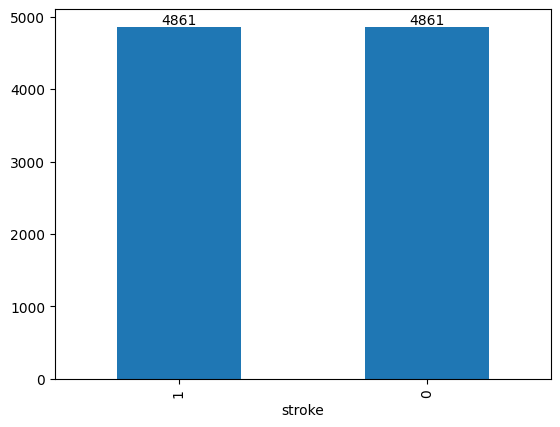

In [ ]:
ax = health_data.stroke.value_counts().plot(kind='bar')
for i in ax.containers:
  ax.bar_label(i)

In [ ]:
stroke_df = health_data[health_data['stroke']==1]
stroke_df.shape

(4861, 11)

In [ ]:
No_stroke_df = health_data[health_data['stroke'] == 0]
No_stroke_df.shape

(4861, 11)

selecting 300 records from the no stroke data frame

In [ ]:
# No_stroke_df1 = No_stroke_df.sample(300)
No_stroke_df1 = No_stroke_df.sample(4861)
No_stroke_df1.shape


(4861, 11)

**Creating New Balanced Dataset**


In [ ]:
health_data_new = pd.concat([stroke_df, No_stroke_df1], axis =0)
health_data_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.15057,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1


In [ ]:
health_data_new.shape

(9722, 11)

[Text(0, 0, '4861'), Text(0, 0, '4861')]


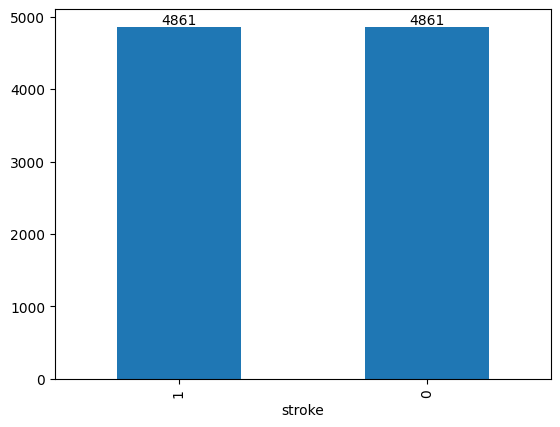

In [ ]:
ax = health_data_new.stroke.value_counts().plot(kind='bar')
for i in ax.containers:
  print(ax.bar_label(i))

##Feature Engineeering

Label Encoding :
 onvaerting categorical columns to numeric columns using label encoding:

In [ ]:
Cat_columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [ ]:
health_data_new['gender'] = Label_Encoder.fit_transform(health_data_new['gender'])
le_gender = dict(zip(Label_Encoder.classes_, Label_Encoder.transform(Label_Encoder.classes_)))
le_gender

{'Female': 0, 'Male': 1, 'Other': 2}

In [ ]:
health_data_new['ever_married'] = Label_Encoder.fit_transform(health_data_new['ever_married'])
le_married = dict(zip(Label_Encoder.classes_, Label_Encoder.transform(Label_Encoder.classes_)))
le_married

{'No': 0, 'Yes': 1}

In [ ]:
health_data_new['work_type'] = Label_Encoder.fit_transform(health_data_new['work_type'])
le_workType = dict(zip(Label_Encoder.classes_, Label_Encoder.transform(Label_Encoder.classes_)))
le_workType

{'Govt_job': 0,
 'Never_worked': 1,
 'Private': 2,
 'Self-employed': 3,
 'children': 4}

In [ ]:
health_data_new['Residence_type'] = Label_Encoder.fit_transform(health_data_new['Residence_type'])
le_residenceType = dict(zip(Label_Encoder.classes_, Label_Encoder.transform(Label_Encoder.classes_)))
le_residenceType

{'Rural': 0, 'Urban': 1}

In [ ]:
health_data_new['smoking_status'] = Label_Encoder.fit_transform(health_data_new['smoking_status'])
le_smokingStatus = dict(zip(Label_Encoder.classes_, Label_Encoder.transform(Label_Encoder.classes_)))
le_smokingStatus

{'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}

In [ ]:
health_data_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60000,1,1
1,0,61.0,0,0,1,3,0,202.21,29.15057,2,1
2,1,80.0,0,1,1,2,0,105.92,32.50000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.40000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.00000,2,1


###Feature Scaling
Bring all the numeric variables  on the same scale using Normalization or Standardization

In [ ]:
Num_columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler()

In [ ]:
health_data_new['age'] = std_scaler.fit_transform(health_data_new[['age']])
health_data_new['avg_glucose_level'] = std_scaler.fit_transform(health_data_new[['avg_glucose_level']])
health_data_new['bmi'] = std_scaler.fit_transform(health_data_new[['bmi']])

In [ ]:
health_data_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.498755,0,1,1,2,1,1.927550,1.185231,1,1
1,0,0.229703,0,0,1,3,0,1.445304,0.000000,2,1
2,1,1.081700,0,1,1,2,0,-0.308302,0.532906,2,1
3,0,-0.308400,0,0,1,2,1,0.881105,0.835203,3,1
4,0,1.036858,1,0,1,3,0,0.933737,-0.819474,2,1


## Dependent & Independent Variables:
X, y

In [ ]:
X = health_data_new.drop('stroke', axis = 1)
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,0.498755,0,1,1,2,1,1.927550,1.185231,1
1,0,0.229703,0,0,1,3,0,1.445304,0.000000,2
2,1,1.081700,0,1,1,2,0,-0.308302,0.532906,2
3,0,-0.308400,0,0,1,2,1,0.881105,0.835203,3
4,0,1.036858,1,0,1,3,0,0.933737,-0.819474,2


####**Traget Variable:**

In [ ]:
y = health_data_new['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
2350    0
1233    0
525     0
4106    0
4049    0
Name: stroke, Length: 9722, dtype: int64

####**Splitting Data into Training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
x_train.shape, x_test.shape

((7777, 10), (1945, 10))

###**Model Building:**

####Model Evaluation:

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

####**Building Multiple Predictive Classification Models**
* Logistics Regression
* Random Forest
* Support Vector Machines
* Naive Bayes


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

####**Building object of each Model**

In [ ]:
Log_reg_model = LogisticRegression()
Random_forest_model = RandomForestClassifier()
Svc_model = SVC(probability=True) #SVC()
Naive_bayes_model = GaussianNB()

In [ ]:
model_list = [Log_reg_model, Random_forest_model, Svc_model, Naive_bayes_model]
acc_list = []
model_name = []
for model in model_list:
  model.fit(x_test, y_test)
  y_predicted = model.predict(x_test)
  acc = accuracy_score(y_test, y_predicted)
  acc_list.append(acc)
  model_name.append(model.__class__.__name__)



In [ ]:
model_df = pd.DataFrame({'Model' :model_name, 'Accuracy' :acc_list})
model_df


,Model,Accuracy
0,LogisticRegression,0.821080
1,RandomForestClassifier,1.000000
2,SVC,0.946015
3,GaussianNB,0.784576


###charting the graphs


<ipython-input-58-0c3b7a989a91>:9: RuntimeWarning: invalid value encountered in divide
  f1 = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score


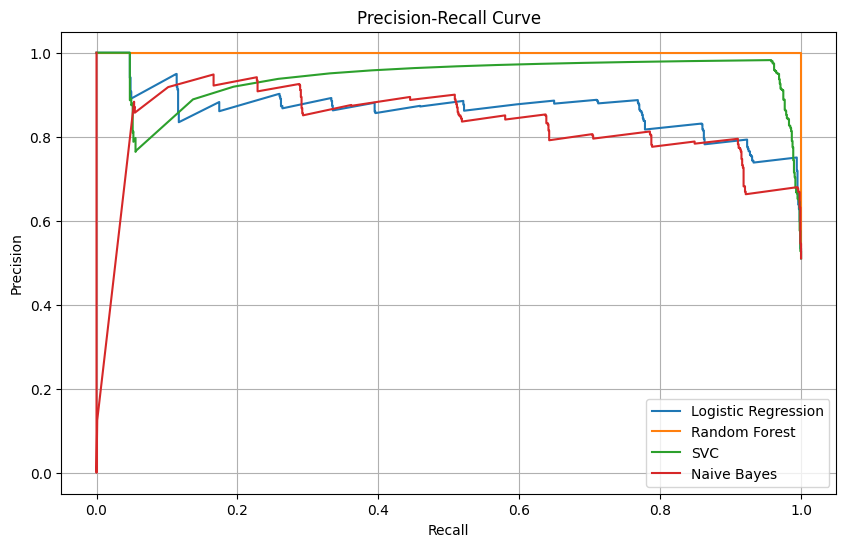

In [ ]:
models = [Log_reg_model, Random_forest_model, Svc_model, Naive_bayes_model]  # List of trained models
model_names = ['Logistic Regression', 'Random Forest', 'SVC', 'Naive Bayes']  # List of model names

plt.figure(figsize=(10, 6))

for model, name in zip(models, model_names):
    y_pred_prob = model.predict_proba(x_test)[:, 1]  # Get predicted probabilities for the positive class
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    f1 = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score

    plt.plot(recall, precision, label=name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

plt.legend()
plt.grid(True)
plt.show()

##Model Validation -K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
models = [Log_reg_model, Random_forest_model, Svc_model, Naive_bayes_model]
features = X
labels = y

CV  = 5
accu_list = [] #Accuracy list
ModelName = [] # Model Name List

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring = 'accuracy', cv = CV)
  accu_list.append(accuracies.mean())
  ModelName.append(model_name)

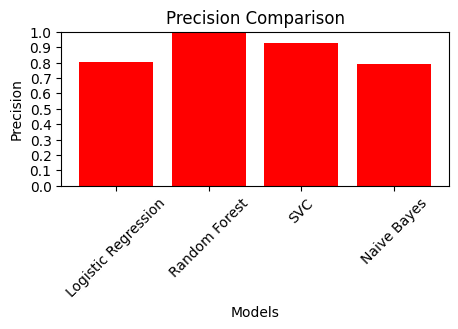

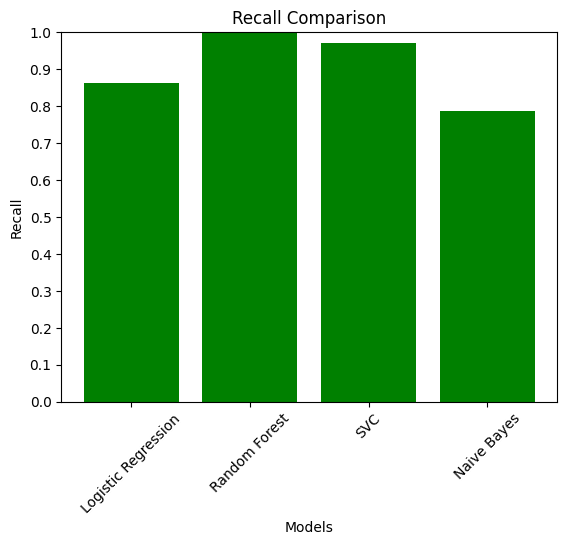

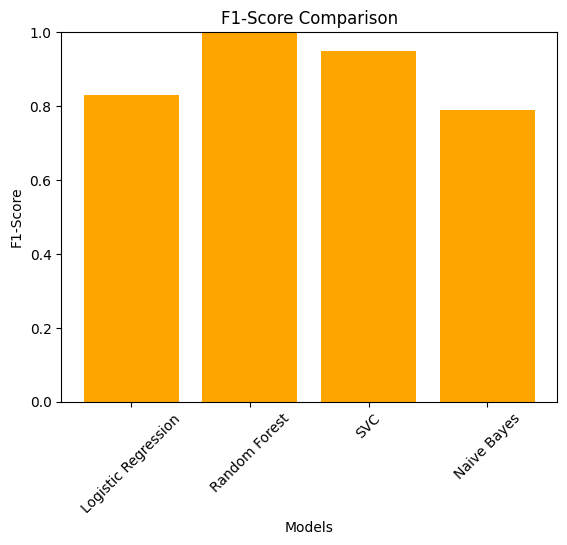

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Define lists of trained models and model names
models = [Log_reg_model, Random_forest_model, Svc_model, Naive_bayes_model]
model_names = ['Logistic Regression', 'Random Forest', 'SVC', 'Naive Bayes']

# Initialize lists to store precision, recall, and F1-score values for each model
precision_list = []
recall_list = []
f1_list = []

# Calculate precision, recall, and F1-score for each model
for model in models:
    y_pred = model.predict(x_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Plot precision chart
plt.figure(figsize=(5, 2))
plt.bar(model_names, precision_list, color='red')
plt.title('Precision Comparison')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.yticks(np.arange(0, 1.1, 0.1))  # Set y-ticks with more precise numbers

plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Plot recall chart
#plt.figure(figsize=(10, 5))
plt.bar(model_names, recall_list, color='green')
plt.title('Recall Comparison')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.yticks(np.arange(0, 1.1, 0.1, ))  # Set y-ticks with more precise numbers

plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Plot F1-score chart
#plt.figure(figsize=(10, 5))
plt.bar(model_names, f1_list, color='orange')
plt.title('F1-Score Comparison')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


####**Model - Accuracy:**

In [ ]:
model_df_cv = pd.DataFrame({'Model' :ModelName, 'Accuracy' :accu_list})
model_df_cv

,Model,Accuracy
0,LogisticRegression,0.810226
1,RandomForestClassifier,0.975013
2,SVC,0.950942
3,GaussianNB,0.784818


###**SVC Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
# param_grid = {'C': [0.1, 1, 10, 100],
#               'gamma': [1, 0.1, 0.01, 0.001],
#               'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1],
              'kernel': ['rbf', 'linear'],
              'probability': [True]}

# Initialize the SVC model
svc = SVC(probability=True)

# Initialize GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best estimator
best_svc = grid_search.best_estimator_

# Fit the best estimator on the training data
best_svc.fit(x_train, y_train)

# Predictions on the test set
y_pred = best_svc.predict(x_test)

# Accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf', 'probability': True}
Accuracy: 0.9712082262210797


In [ ]:
# @title
print(" Enter Patient's Data")
Gender = int(input("Enter the gender ",))
Age = int(input("Enter the Age = ",))
Age_scaled = std_scaler.fit_transform([[Age]])[0][0]
HyperTension = int(input("Enter the Hypertension ="))
HeartDisease = int(input("Enter the Heart Disease ="))
WorkType = int(input("Enter the WorkType ="))
EverMarried = int(input("Enter the Evermarried ="))
ResType = int(input("Enter the Resident Type ="))
AGL = float(input("Enter the Average Glucose Level ="))
Glucose_scaled = std_scaler.fit_transform([[AGL]])[0][0]
BMI = float(input("Enter the BMI = "))
bmi_scaled = std_scaler.fit_transform([[BMI]])[0][0]
SmokeStatus = int(input("Enter the Smoking Status = ,"))

#1) id: unique identifier
# 2) gender: "Male", "Female" or "Other"
# 3) age: age of the patient
# 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
# 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
# 6) ever_married: "No" or "Yes"
# 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
# 8) Residence_type: "Rural" or "Urban"
# 9) avg_glucose_level: average glucose level in blood
# 10) bmi: body mass index
# 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
# 12) stroke: 1 if the patient had a stroke or 0 if not

#Demo Data input fields
# Enter Patient's Data
# Enter the gender 1
# Enter the Age = 12
# Enter the Hypertension =1
# Enter the Heart Disease =1
# Enter the WorkType =1
# Enter the Evermarried =0
# Enter the Resident Type =1
# Enter the Average Glucose Level =20
# Enter the BMI = 20
# Enter the Smoking Status = ,2

# 1 56 1 1 2 1 2 45 34 2

 Enter Patient's Data
Enter the gender 1
Enter the Age = 56
Enter the Hypertension =1
Enter the Heart Disease =1
Enter the WorkType =2
Enter the Evermarried =1
Enter the Resident Type =2
Enter the Average Glucose Level =45
Enter the BMI = 34
Enter the Smoking Status = ,2


In [ ]:

Patients_data = [Gender, Age_scaled, HyperTension, HeartDisease, WorkType, EverMarried, ResType, Glucose_scaled, bmi_scaled, SmokeStatus]
prob = best_svc.predict_proba([Patients_data])
# Extract the probability of heart stroke
heart_stroke_prob = prob[0][1] * svc_multiplier

print("Probability of Heart Stroke:", heart_stroke_prob, "%")

Probability of Heart Stroke: 54.89879209898026 %


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
